In [1]:
import johnny_deep

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)

<module 'johnny_deep.utils' from '/Users/marco/Desktop/johnny_deep/johnny_deep/utils.py'>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [4]:
X, Y = make_moons(n_samples=1000, noise=0.10, random_state=100)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()
del X, Y

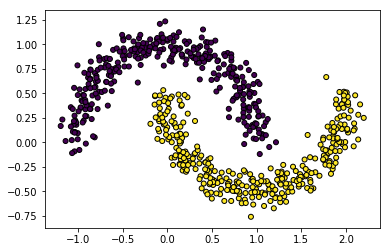

In [6]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [7]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
    {"dimension": 20, "type": "sigmoid"},
    {"dimension": 20, "type": "sigmoid"},
    {"dimension": 20, "type": "sigmoid"},
# WORKSHOP #5: code ReLU activation function
#     {"dimension": 20, "type": "relu"},
#     {"dimension": 20, "type": "relu"},
#     {"dimension": 20, "type": "relu"},
    {"dimension": 1, "type": "sigmoid"},
]

In [8]:
m = johnny_deep.models.Model(nn_architecture)

In [9]:
m.model_info()

Layer 1: sigmoid with dimension 20
W shape: (20, 2)
b shape: (20, 1)
Layer 2: sigmoid with dimension 20
W shape: (20, 20)
b shape: (20, 1)
Layer 3: sigmoid with dimension 20
W shape: (20, 20)
b shape: (20, 1)
Layer 4: sigmoid with dimension 1
W shape: (1, 20)
b shape: (1, 1)


In [10]:
# WORKSHOP #6
# m.fit(X_train, Y_train, 2000, 0.1, mini_batch_size=32)
for ix in range(10000):
    Y_hat = m.forward(X_train)
    # Workshop #4: fill the batch gradient descent loop
    epoch_no = ix+1
    cost = johnny_deep.utils.get_cost_value(Y_hat, Y_train)
    if epoch_no % 100 == 0:
        print("Epoch {} - cost {}".format(epoch_no, cost))

Epoch 100 - cost 0.6931553338712682
Epoch 200 - cost 0.6931508471376041
Epoch 300 - cost 0.6931464689030872
Epoch 400 - cost 0.6931421859364675
Epoch 500 - cost 0.693137985592215
Epoch 600 - cost 0.6931338557310739
Epoch 700 - cost 0.6931297846459208
Epoch 800 - cost 0.6931257609920773
Epoch 900 - cost 0.693121773721306
Epoch 1000 - cost 0.6931178120187741
Epoch 1100 - cost 0.6931138652423281
Epoch 1200 - cost 0.6931099228634469
Epoch 1300 - cost 0.6931059744092803
Epoch 1400 - cost 0.6931020094051908
Epoch 1500 - cost 0.6930980173172211
Epoch 1600 - cost 0.6930939874939215
Epoch 1700 - cost 0.6930899091069425
Epoch 1800 - cost 0.693085771089794
Epoch 1900 - cost 0.693081562074134
Epoch 2000 - cost 0.6930772703229074
Epoch 2100 - cost 0.6930728836596128
Epoch 2200 - cost 0.6930683893928961
Epoch 2300 - cost 0.6930637742356031
Epoch 2400 - cost 0.6930590242173169
Epoch 2500 - cost 0.6930541245892952
Epoch 2600 - cost 0.6930490597205816
Epoch 2700 - cost 0.6930438129839073
Epoch 2800 - c

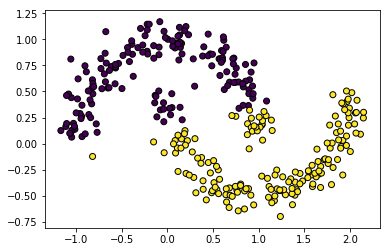

In [11]:
Y_hat = m.forward(X_test)
Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
plt.scatter(X_test[0, :], X_test[1, :], marker='o', c=Y_pred, edgecolor='k')